# ATIVIDADE 01 - Fundamentos de Aprendizagem de Máquina

by *João Vitor Aguiar*

# ESTUDANDO O DATASET

## Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [ ]:
# As colunas do dataframe estão enumeradas de 0 à 111, ou seja 112 colunas.

df_estudo = pd.read_csv('fraud_detection_bank_dataset.csv')
df_estudo.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [ ]:
# O dataset conta com mais de 20k de registros.
# Além de possuir uma coluna sem nome, apenas contando a linha em questão, por isso a eliminei.

print('Quantidade de registros:',df_estudo.count()[0])
df_estudo = df_estudo.drop(columns=['Unnamed: 0'])

Quantidade de registros: 20468


In [ ]:
# Percebe-se que as classes no dataset não estão balanceadas, o que afetará as métricas de avaliação.

print("Porcentagem de registros classificados como 0: {:.2F}%".format(df_estudo.loc[df_estudo['targets']==0]['col_0'].count()*100/df_estudo['col_0'].count()))

Porcentagem de registros classificados como 0: 73.43%


C:\Users\Vitor\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


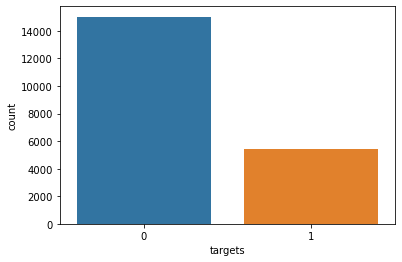

In [ ]:
sns.countplot(df_estudo['targets']);

##### 10 Variáveis com maior correlação com o target:

In [ ]:
''' Crei uma tabela que dispunha da correlalção de cada varável em relação as outras no dataset. 
    Ordenei os dados em relação às que tiveram maior correlação com a varável target.
    Como a correlação entre a variável target e ela mesma é maxima, pegamos as 11 maiores correlação em valor absoluto.
'''

df_top10_corr = df_estudo.corr().sort_values(by='targets', key=lambda col: abs(col), ascending=False).head(11)
df_top10_corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
targets,-0.041022,-0.109658,-0.026381,-0.095612,0.007819,0.058073,-0.017351,-0.041022,NaN,NaN,...,-0.035880,0.273051,0.024011,-0.268248,-0.190384,-0.004204,0.166826,0.071049,0.262442,1.000000
col_83,-0.025439,-0.075970,-0.009952,-0.049615,-0.014467,0.027418,-0.022827,-0.025439,NaN,NaN,...,0.008348,0.305090,0.022792,-0.131351,-0.102215,-0.002345,0.234066,0.034386,0.313272,0.519494
col_76,0.009584,0.035849,-0.016473,-0.047848,0.024198,0.157780,0.005606,0.009584,NaN,NaN,...,0.025957,0.233352,0.004270,0.046256,0.065039,-0.002261,0.091140,0.021830,0.305208,0.311553
col_86,-0.022820,-0.046003,-0.009089,-0.027191,-0.010496,0.022068,-0.027833,-0.022820,NaN,NaN,...,-0.011889,0.156870,-0.002995,-0.084935,-0.067836,-0.001237,0.024058,-0.001029,0.174080,0.276921
col_74,-0.014262,0.001045,0.000192,-0.014650,0.011773,0.040376,0.037212,-0.014262,NaN,NaN,...,0.035052,0.151922,0.007080,-0.039631,-0.014360,-0.001312,0.103986,0.064527,0.247247,0.273117
col_104,-0.009675,0.021930,0.001027,-0.038370,0.025733,0.066406,0.039103,-0.009675,NaN,NaN,...,-0.050163,1.000000,-0.010127,0.004313,0.054961,-0.005221,0.107412,0.003011,0.402607,0.273051
col_85,0.008882,-0.025984,-0.008142,-0.028404,0.011929,0.040456,-0.003718,0.008882,NaN,NaN,...,0.003649,0.155757,-0.002971,-0.076045,-0.064763,-0.001235,0.088718,-0.003789,0.168936,0.270597
col_14,0.081488,0.195358,0.010522,0.097291,0.019296,0.072007,-0.017828,0.081488,NaN,NaN,...,0.084787,-0.057616,-0.016788,0.194195,0.198399,-0.005278,-0.023821,0.031141,0.037503,-0.270216
col_106,0.075413,0.232897,0.041971,0.148617,0.059956,0.116859,0.007471,0.075413,NaN,NaN,...,0.060260,0.004313,0.054821,1.000000,0.703346,0.010468,0.057408,0.061286,0.221531,-0.268248
col_111,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,NaN,NaN,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,1.000000,0.262442


In [ ]:
# Criando um dataframe com as 10 melhores variáveis preditoras de acordo com a correlação:

df_top_10 = df_estudo[df_top10_corr.index]
df_top_10

,targets,col_83,col_76,col_86,col_74,col_104,col_85,col_14,col_106,col_111,col_89
0,1,0,0,0,0,0,0,1,1,49,0
1,1,0,0,0,0,1,0,0,0,55,1
2,1,0,0,0,0,0,0,1,1,56,0
3,1,0,0,0,0,1,0,0,1,65,0
4,1,0,1,0,0,0,0,1,1,175,0
...,...,...,...,...,...,...,...,...,...,...,...
20463,0,0,0,0,0,1,0,0,0,85,0
20464,0,0,0,0,0,0,0,0,0,7,0
20465,0,0,0,0,0,1,0,0,0,45,0
20466,0,0,0,0,0,0,0,0,0,5,0


In [ ]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade

def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

##### Uma vizualização para facilitar a compreenção das correlações dos dados.

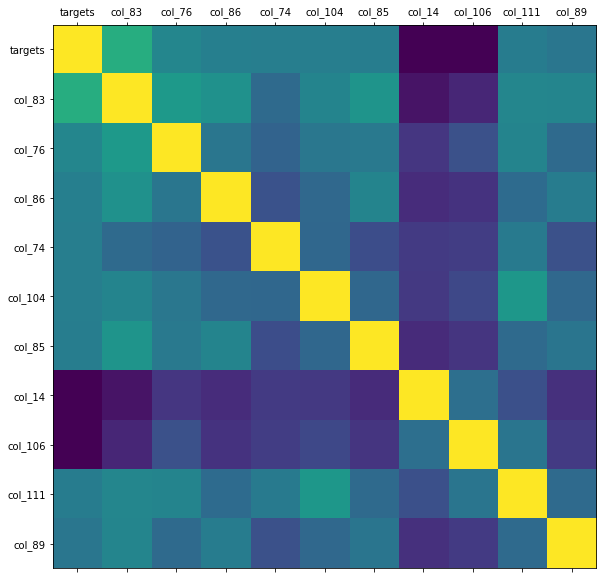

In [ ]:
plot_corr(df_top_10)

In [ ]:
# Na forma de tabela
'''
    Visualizando a correlação em tabela
    Coeficiente de correlação: 
    +1  = forte correlação positiva
    0   = não há correlação
    -1  = forte correlação negativa
'''

df_top_10.corr()

,targets,col_83,col_76,col_86,col_74,col_104,col_85,col_14,col_106,col_111,col_89
targets,1.000000,0.519494,0.311553,0.276921,0.273117,0.273051,0.270597,-0.270216,-0.268248,0.262442,0.227494
col_83,0.519494,1.000000,0.411629,0.371083,0.167532,0.305090,0.387926,-0.201067,-0.131351,0.313272,0.308642
col_76,0.311553,0.411629,1.000000,0.228474,0.136115,0.233352,0.245564,-0.069783,0.046256,0.305208,0.171181
col_86,0.276921,0.371083,0.228474,1.000000,0.051504,0.156870,0.304171,-0.107645,-0.084935,0.174080,0.265024
col_74,0.273117,0.167532,0.136115,0.051504,1.000000,0.151922,0.031258,-0.052160,-0.039631,0.247247,0.044152
col_104,0.273051,0.305090,0.233352,0.156870,0.151922,1.000000,0.155757,-0.057616,0.004313,0.402607,0.158515
col_85,0.270597,0.387926,0.245564,0.304171,0.031258,0.155757,1.000000,-0.113310,-0.076045,0.168936,0.221023
col_14,-0.270216,-0.201067,-0.069783,-0.107645,-0.052160,-0.057616,-0.113310,1.000000,0.194195,0.037503,-0.092252
col_106,-0.268248,-0.131351,0.046256,-0.084935,-0.039631,0.004313,-0.076045,0.194195,1.000000,0.221531,-0.052262
col_111,0.262442,0.313272,0.305208,0.174080,0.247247,0.402607,0.168936,0.037503,0.221531,1.000000,0.170583


In [ ]:
# Analisando o dataset 'df_top_10', observemos que existe somente uma varável numérica, a 'col_111', as demais são categóricas.

for i in df_top_10.drop(columns=['targets']).columns:
    if len(np.unique(df_top_10[i]))==2:
        print('A varriável {} é categórica.'.format(i))
    else:
        print('A varriável {} é numérica.'.format(i))

A varriável col_83 é categórica.
A varriável col_76 é categórica.
A varriável col_86 é categórica.
A varriável col_74 é categórica.
A varriável col_104 é categórica.
A varriável col_85 é categórica.
A varriável col_14 é categórica.
A varriável col_106 é categórica.
A varriável col_111 é numérica.
A varriável col_89 é categórica.


##### Vizualizando a distribuição da varável numérica (col_111)

C:\Users\Vitor\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


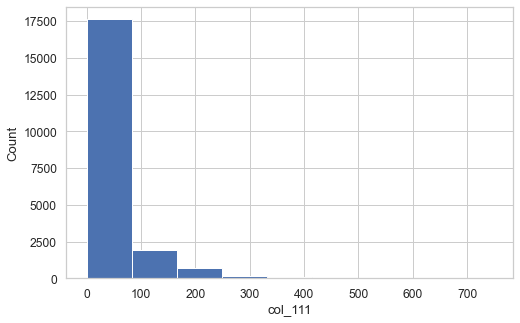

In [ ]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df_top_10['col_111'], norm_hist=False, kde=False, bins=9, hist_kws={"alpha": 1}
).set(xlabel='col_111', ylabel='Count');

# VERSÃO 01

A versão 01 tem como objetivo servir de paramêtro para futuros modelos, por isso, não irei tratar os dados e nem fazer noramlização. Irei considerar todas as variáveis para a consrtrução do modelo. Sendo assim, ela servirá de modelo base, qualquer melhoria na avaliações de próximos modelos, será um avanço.

In [ ]:
# Para esta primeira versão, iremos aproveitar o dataset base anterior.

df1_v1 = df_estudo.copy()

In [ ]:
# Por essa métrica, podemos inferir que a maioria das variáveis são categóricas.

nume = 0
cate = 0
for i in df1_v1.drop(columns=['targets']).columns:
    if len(np.unique(df1_v1[i]))<=10:               # Se o número de valores únicos for <= 10, consideirei categórica.
        cate+=1
    else:
        nume+=1
print('Quantidade de variáveis:\nNuméricas: {}\nCategóricas: {}'.format(nume,cate))

Quantidade de variáveis:
Numéricas: 50
Categóricas: 62


## Imports

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

## Model Selection

Irei utilizar o modelo de Regressão Logística e  Random Forest, dois modelos são recomendados para classificação. Como se trata de muitas variaveis, acredito que o SVM não se ajuste tão bem quanto a regressão losgística. E pelo fato de existirem muitos registros, talvez a predição do KNN gere um leve delay em relação ao random forest.

## Spliting dos dados

In [ ]:
X = df1_v1.drop(columns=['targets']).values
y = df1_v1['targets'].values

In [ ]:
# Infelizmente o modelo de regressão logística não convergiu sem normalizar os dados.

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [ ]:
# 80% dos dados iram para o conjunto 'train_test' e 20% para o de validação

X_train_test, X_validation, y_train_test, y_validation = train_test_split(X, y, test_size=0.20, random_state=13)

In [ ]:
X_train_test.shape

(16374, 112)

## Construção e avaliação dos modelos preditivos

In [ ]:
# Definindo os valores para os folds

num_folds = 10
seed = 7

In [ ]:
# Separando os dados em folds 
kfolds = KFold(num_folds, shuffle=True, random_state=seed, )

##### Ajustando os hiper-parâmetros:

In [ ]:
# Instanciando o modelo de regressão logística
modelo_reglog_v1_1 = LogisticRegression(random_state=0, max_iter=1000)

# Instanciando o modelo de random forest
modelo_ranfor_v1_1 = RandomForestClassifier()

In [ ]:
# Ajustando os hiperparâmetros com cross validation - Versão 1.1

resultado_reglog_v1_1 = cross_val_score(modelo_reglog_v1_1, X_train_test, y_train_test, cv=kfolds)
resultado_ranfor_v1_1 = cross_val_score(modelo_ranfor_v1_1, X_train_test, y_train_test, cv=kfolds)

In [ ]:
print('Versão 1.1 - Regressão Logistica: {}'.format(resultado_reglog_v1_1.mean())) 

Versão 1.1 - Regressão Logistica: 0.8812145568407022


In [ ]:
print('Versão 1.1 - Radom Forest: {}'.format(resultado_ranfor_v1_1.mean())) 

Versão 1.1 - Radom Forest: 0.9311101713056509


Neste dataset, não obtive melhor resultado com outros parâmetros tanto para o Randon forest quanto para a Regressão Logística. Os hiperparâmetros default, já conseguiram bons desempenhos.

## Treinamento dos melhores modelos

In [ ]:
modelo_reglog_v1_final = modelo_reglog_v1_1
modelo_ranfor_v1_final = modelo_ranfor_v1_1

In [ ]:
modelo_reglog_v1_final.fit(X_train_test, y_train_test)
modelo_ranfor_v1_final.fit(X_train_test, y_train_test)

RandomForestClassifier()

## Avaliação dos modelos

In [ ]:
# Predição
y_pred_reglog = modelo_reglog_v1_final.predict(X_validation)
y_pred_ranfor = modelo_ranfor_v1_final.predict(X_validation)

In [ ]:
# Acurácia
print("Acurácia:")
print('- regressão losgística: {:.2F}'.format(accuracy_score(y_validation, y_pred_reglog)))
print('- randon forest: {:.2F}'.format(accuracy_score(y_validation, y_pred_ranfor)))

Acurácia:
- regressão losgística: 0.89
- randon forest: 0.93


In [ ]:
# Score F1
print("Score f1:")
print('- regressão losgística é: {:.2F}'.format(f1_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(f1_score(y_validation, y_pred_ranfor)))

Score f1:
- regressão losgística é: 0.75
- randon forest é: 0.85


In [ ]:
# Precision
print("Precision Score:")
print('- regressão losgística é: {:.2F}'.format(precision_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(precision_score(y_validation, y_pred_ranfor)))

Precision Score:
- regressão losgística é: 0.89
- randon forest é: 0.91


In [ ]:
# Recall
print("Recall Score:")
print('- regressão losgística é: {:.2F}'.format(recall_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(recall_score(y_validation, y_pred_ranfor)))

Recall Score:
- regressão losgística é: 0.64
- randon forest é: 0.80


# VERSÃO 02

Na versão 02 irei utilizar as 10 melhores variáveis para predição do modelo segundo as métricas ditas anteriormente. Além de normalizar os dados, e balancear o dataset.

## Imports

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

## Balanceando os dados utilizando o método de Under-Sample

In [ ]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

C:\Users\Vitor\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


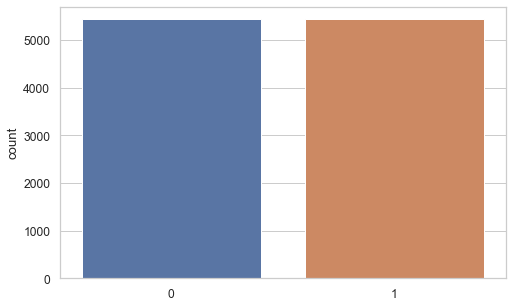

In [ ]:
# Agora as classes estão balanceadas estão balanceados.

sns.countplot(y_res);

## Spliting dos dados

In [ ]:
# O dataframe utilizado na versão 02.1 é o mesmo que o top 10 melhores variáveis preditotoras.
df1_v2 = df_top_10.copy()

In [ ]:
X = df1_v2.drop(columns=['targets']).values
y = df1_v2['targets'].values

In [ ]:
# Balanceando os dados
X_res, y_res = rus.fit_resample(X, y)

In [ ]:
# Normalizando os dados
sc_X = StandardScaler()
X_res = sc_X.fit_transform(X_res)

In [ ]:
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_res, y_res, test_size=0.20, random_state=13)

## Construção e avaliação dos modelos preditivos

### Versão 2.1

In [ ]:
# Instanciando o modelo de regressão logística
modelo_reglog_v2_1 = LogisticRegression(random_state=0, max_iter=1000)

# Instanciando o modelo de random forest
modelo_ranfor_v2_1 = RandomForestClassifier()

In [ ]:
# Ajustando os hiperparâmetros com cross validation - Versão 2.1

resultado_reglog_v2_1 = cross_val_score(modelo_reglog_v2_1, X_train_test, y_train_test, cv=kfolds)
resultado_ranfor_v2_1 = cross_val_score(modelo_ranfor_v2_1, X_train_test, y_train_test, cv=kfolds)

In [ ]:
print('Versão 2.1 - Regressão Logistica: {:.2}'.format(resultado_reglog_v2_1.mean())) 
print('Versão 2.1 - Radom Forest: {:.2}'.format(resultado_ranfor_v2_1.mean())) 

Versão 1.1 - Regressão Logistica: 0.77
Versão 1.1 - Radom Forest: 0.82


### Versão 2.2

In [ ]:
# Em vez de pegar os 10 melhores variáveis, pegarei as 20 melhores correlações
df2_v2 = df_estudo[df_estudo.corr().sort_values(by='targets', key=lambda col: abs(col), ascending=False).head(21).index]

In [ ]:
# Valores NA - nenhum
df2_v2.isna().sum()

targets    0
col_83     0
col_76     0
col_86     0
col_74     0
col_104    0
col_85     0
col_14     0
col_106    0
col_111    0
col_89     0
col_84     0
col_87     0
col_98     0
col_107    0
col_77     0
col_68     0
col_109    0
col_73     0
col_94     0
col_102    0
dtype: int64

In [ ]:
# Valores nulos - nenhum
df2_v2.isnull().sum()

targets    0
col_83     0
col_76     0
col_86     0
col_74     0
col_104    0
col_85     0
col_14     0
col_106    0
col_111    0
col_89     0
col_84     0
col_87     0
col_98     0
col_107    0
col_77     0
col_68     0
col_109    0
col_73     0
col_94     0
col_102    0
dtype: int64

### Spliting dos dados

In [ ]:
X = df2_v2.drop(columns=['targets']).values
y = df2_v2['targets'].values

In [ ]:
# Balanceando os dados
X_res, y_res = rus.fit_resample(X, y)

In [ ]:
# Normalizando os dados
sc_X = StandardScaler()
X_res = sc_X.fit_transform(X_res)

In [ ]:
X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_res, y_res, test_size=0.20, random_state=13)

In [ ]:
# Instanciando o modelo de regressão logística
modelo_reglog_v2_2 = LogisticRegression(random_state=0, max_iter=1000)

# Instanciando o modelo de random forest
modelo_ranfor_v2_2 = RandomForestClassifier()

In [ ]:
# Ajustando os hiperparâmetros com cross validation - Versão 2.1

resultado_reglog_v2_2 = cross_val_score(modelo_reglog_v2_2, X_train_test, y_train_test, cv=kfolds)
resultado_ranfor_v2_2 = cross_val_score(modelo_ranfor_v2_2, X_train_test, y_train_test, cv=kfolds)

In [ ]:
print('Versão 2.2 - Regressão Logistica: {:.2}'.format(resultado_reglog_v2_2.mean())) 
print('Versão 2.2 - Radom Forest: {:.2}'.format(resultado_ranfor_v2_2.mean())) 

Versão 2.2 - Regressão Logistica: 0.82
Versão 2.2 - Radom Forest: 0.84


## Treinamento dos melhores modelos

In [ ]:
modelo_reglog_v2_final = modelo_reglog_v2_2
modelo_ranfor_v2_final = modelo_ranfor_v2_2

In [ ]:
modelo_reglog_v2_final.fit(X_train_test, y_train_test)
modelo_ranfor_v2_final.fit(X_train_test, y_train_test)

RandomForestClassifier()

## Avaliação dos modelos

In [ ]:
# Predição
y_pred_reglog = modelo_reglog_v2_final.predict(X_validation)
y_pred_ranfor = modelo_ranfor_v2_final.predict(X_validation)

In [ ]:
# Acurácia
print("Acurácia:")
print('- regressão losgística: {:.2F}'.format(accuracy_score(y_validation, y_pred_reglog)))
print('- randon forest: {:.2F}'.format(accuracy_score(y_validation, y_pred_ranfor)))

Acurácia:
- regressão losgística: 0.80
- randon forest: 0.81


In [ ]:
# Score F1
print("Score f1:")
print('- regressão losgística é: {:.2F}'.format(f1_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(f1_score(y_validation, y_pred_ranfor)))

Score f1:
- regressão losgística é: 0.80
- randon forest é: 0.81


In [ ]:
# Precision
print("Precision Score:")
print('- regressão losgística é: {:.2F}'.format(precision_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(precision_score(y_validation, y_pred_ranfor)))

Precision Score:
- regressão losgística é: 0.79
- randon forest é: 0.82


In [ ]:
# Recall
print("Recall Score:")
print('- regressão losgística é: {:.2F}'.format(recall_score(y_validation, y_pred_reglog)))
print('- randon forest é: {:.2F}'.format(recall_score(y_validation, y_pred_ranfor)))

Recall Score:
- regressão losgística é: 0.82
- randon forest é: 0.81


# VERSÃO 03

Infelizmente não consegui implementar a tempo a versão 03, iria utilizar algorítimos de features selectiom assim como algorítimos para encontrar a melhor configuração de hiperparâmetros para os modelos escolhidos.

# CONCLUSÃO 

Apesar do random forest 1.1 possuir melhores métricas, o 2.2 é mais aplicável, pois conta com menos features, além de ter sido balanceado o dataset. A versão 2.2 é menos precisa, porém caso fosse feita um melhor ajuste aos dados, tenho certeza iria possuir melhores avaliações, sendo isso um ponto a ser melhor estudado por mim.